# ECD Assessment Results - June 2023

In [6]:
# Code to Publish HTML w/out Code from Terminal
# jupyter nbconvert 'June 2023 - ECD Analysis' --TagRemovePreprocessor.remove_input_tags='{"hide_input"}' --to html


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
G3_colour = "#6DA9E4"
G2_colour = "#F7D060"
G1_colour = "#917FB3"
GR_colour = "#98D8AA"
ECD_colour = "#FF6D60"

In [8]:
all_children = pd.read_csv("20230712 - Children Results - English.csv")
children = all_children[all_children['Jan - Listen First Sound'].notna() & all_children['June - Listen First Sound'].notna()].copy()

# # create new column 'Jan-Jun Assessed' where 'Jan - Total' and 'June - Total' are not blank
# children['Jan-Jun Assessed'] = np.where(children['Jan - Total'].notnull() & children['June - Total'].notnull(), 'Assessed', '')


In [9]:
children['Jan - Total'] = children[['Jan - Listen First Sound', 'Jan - Listen Word','Jan - Phonics', 'Jan - Blends', 'Jan - Sight Words',
                                  'Jan - Read Sentences', 'Jan - Read Story', 'Jan - Story Comprehension',
                                  'Jan - Written Letters', 'Jan - Write Name', 'Jan - Write CVCs',
                                  'Jan - Write Sentences']].sum(axis=1,min_count=1)
children['June - Total'] = children[['June - Listen First Sound',
       'June - Listen Word','June - Phonics', 'June - Blends', 'June - Sight Words',
                                  'June - Read Sentences', 'June - Read Story', 'June - Story Comprehension',
                                  'June - Written Letters', 'June - Write Name', 'June - Write CVCs',
                                  'June - Write Sentences']].sum(axis=1,min_count=1)
children['June - Listen First Sound Improvement'] = children['June - Listen First Sound'] - children['Jan - Listen First Sound']
children['June - Listen Word Improvement'] = children['June - Listen Word'] - children['Jan - Listen Word']
children['June - Phonics Improvement'] = children['June - Phonics'] - children['Jan - Phonics']
children['June - Written Letters Improvement'] = children['June - Written Letters'] - children['Jan - Written Letters']

children['June - Total Improvement'] = children['June - Total'] - children['Jan - Total']
children['June - Level Improvement'] = children['May Level'] - children['March Level']

ecd = children[children['Grade'] == 'PreR']
ecd_on = ecd[ecd['On The Programme'] == 'Yes']
ecd_qualify = ecd[(ecd['On The Programme'] == 'Yes') & (ecd['Total Sessions'] > 10)]
gbo_ecd = ecd.groupby('Schools')
gbo_ecd_on = ecd_on.groupby('Schools')
gbo_ecd_qualify = ecd_qualify.groupby('Schools')
df = ecd.copy()

In [10]:
ecd.columns

Index(['Mcode', 'Notes', 'Schools', 'City', 'Centre Type', 'Class', 'Teacher',
       'Grade', 'Hub', 'Classlist Status', 'Assessed', 'Surname', 'Name',
       'Full Name', 'Gender', 'LC Name', 'Pair', 'On The Programme',
       'Start Date', 'Total Sessions', 'March Level', 'May Level',
       'Jan - Listen First Sound', 'Jan - Listen Word', 'Jan - Phonics',
       'Jan - Blends', 'Jan - Sight Words', 'Jan - Read Sentences',
       'Jan - Read Story', 'Jan - Story Comprehension',
       'Jan - Written Letters', 'Jan - Write Name', 'Jan - Write CVCs',
       'Jan - Write Sentences', 'Jan - Total', 'Captured By',
       'June - Listen First Sound', 'June - Listen Word', 'June - Phonics',
       'June - Blends', 'June - Sight Words', 'June - Read Sentences',
       'June - Read Story', 'June - Story Comprehension',
       'June - Written Letters', 'June - Write Name', 'June - Write CVCs',
       'June - Write Sentences', 'June - Total',
       'June - Listen First Sound Improvement',
   

# June Assessment %'s per Site

In [11]:
total_children = gbo_ecd_on['Full Name'].count()
total_children_assessed = gbo_ecd_on['June - Phonics'].count()

percent_assessed = (total_children_assessed / total_children) * 100


df_assessed = pd.DataFrame({'Number of Children': total_children, 
                          'Number of Children Assessed': total_children_assessed, 
                          'Percentage Assessed': percent_assessed})
df_assessed.sort_values('Percentage Assessed', ascending=False)

,Number of Children,Number of Children Assessed,Percentage Assessed
Schools,,,
Aaron Gqadu,15,15,100.0
Bright Angels,12,12,100.0
Sisonke,20,20,100.0
Sinethemba,21,21,100.0
Sifunimfundo,21,21,100.0
Seyisi,11,11,100.0
Qaqawuli Godolozi,17,17,100.0
Paulos Oyigcwele,24,24,100.0
Nonkqubela,15,15,100.0


# Session Stats

### Checking Children Sessions

In [12]:
# Count rows where 'Total Sessions' > 20
over_20 = len(ecd[ecd['Total Sessions'] > 20])

# Count rows where 'Total Sessions' is between 10 and 20
between_10_and_20 = len(ecd[(ecd['Total Sessions'] >= 10) & (ecd['Total Sessions'] <= 20)])

# Count rows where 'Total Sessions' < 10
under_10 = len(ecd[ecd['Total Sessions'] < 10])

# Print the counts
print(f"Rows with 'Total Sessions' > 20: {over_20}")
print(f"Rows with 'Total Sessions' between 10 and 20: {between_10_and_20}")
print(f"Rows with 'Total Sessions' < 10: {under_10}")


Rows with 'Total Sessions' > 20: 182
Rows with 'Total Sessions' between 10 and 20: 132
Rows with 'Total Sessions' < 10: 16


<Axes: xlabel='Total Sessions', ylabel='Count'>

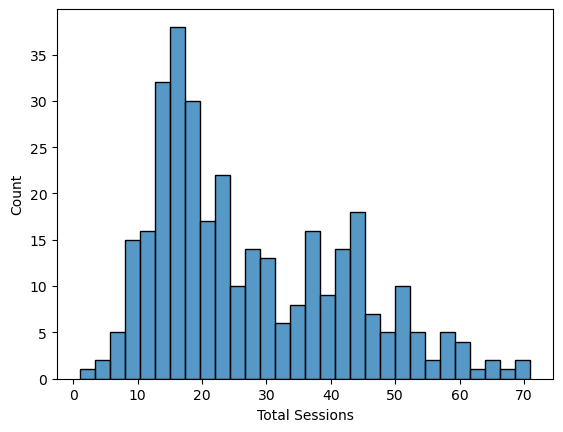

In [13]:
sns.histplot(ecd_on['Total Sessions'].sort_values(), bins=30, kde=False)


### Avg Sessions per Child Per ECD

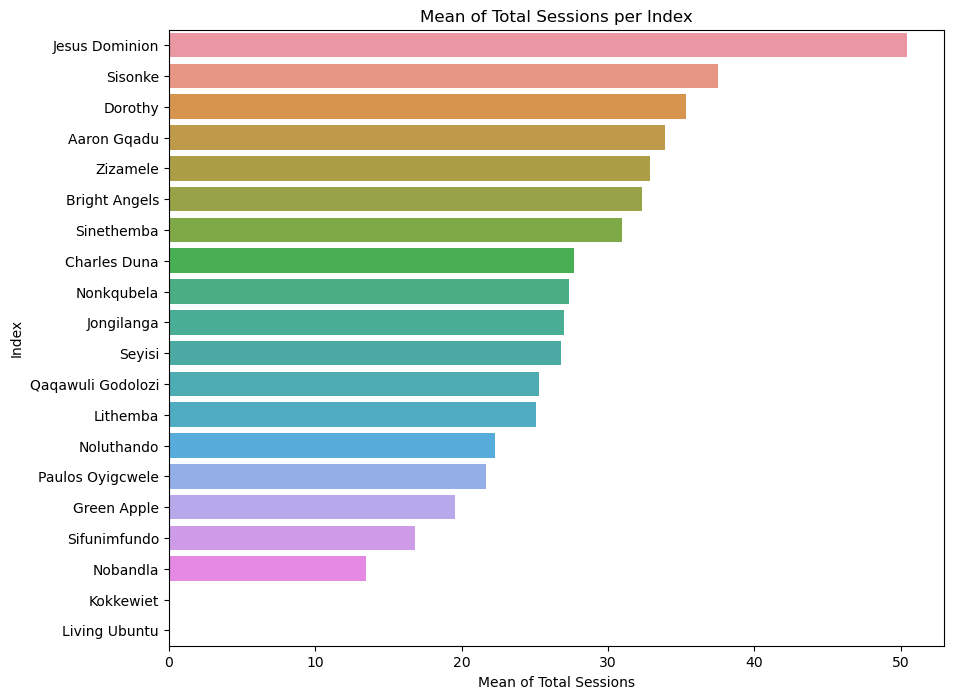

In [14]:
mean_values = gbo_ecd_on['Total Sessions'].mean().sort_values(ascending=False)
mean_df = pd.DataFrame(mean_values).reset_index()
mean_df.columns = ['Index', 'Mean']

import seaborn as sns

plt.figure(figsize=(10,8))
sns.barplot(x='Mean', y='Index', data=mean_df)
plt.xlabel('Mean of Total Sessions')
plt.ylabel('Index')
plt.title('Mean of Total Sessions per Index')
plt.show()


In [15]:
gbo_ecd_on['Total Sessions'].mean().sort_values(ascending=False)

Schools
Jesus Dominion       50.428571
Sisonke              37.500000
Dorothy              35.350000
Aaron Gqadu          33.928571
Zizamele             32.904762
Bright Angels        32.333333
Sinethemba           30.947368
Charles Duna         27.708333
Nonkqubela           27.357143
Jongilanga           27.000000
Seyisi               26.818182
Qaqawuli Godolozi    25.294118
Lithemba             25.058824
Noluthando           22.291667
Paulos Oyigcwele     21.666667
Green Apple          19.523810
Sifunimfundo         16.850000
Nobandla             13.478261
Kokkewiet                  NaN
Living Ubuntu              NaN
Name: Total Sessions, dtype: float64

### Total Number of Sesssions per ECD

<Axes: xlabel='Schools'>

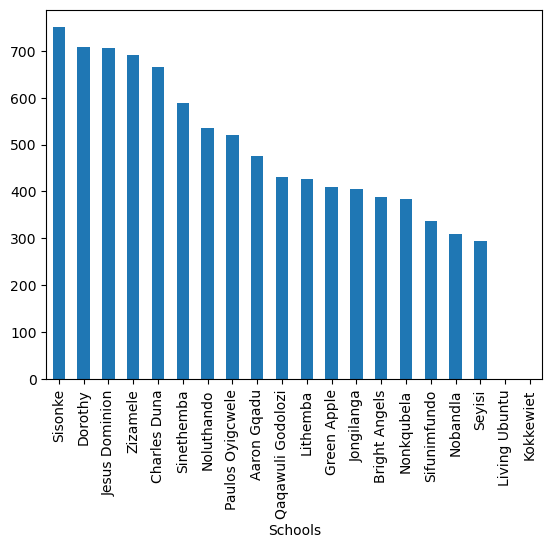

In [16]:
gbo_ecd_on['Total Sessions'].sum().sort_values(ascending=False).plot(kind="bar")

In [17]:
gbo_ecd_on['Total Sessions'].sum().sort_values(ascending=False)

Schools
Sisonke              750.0
Dorothy              707.0
Jesus Dominion       706.0
Zizamele             691.0
Charles Duna         665.0
Sinethemba           588.0
Noluthando           535.0
Paulos Oyigcwele     520.0
Aaron Gqadu          475.0
Qaqawuli Godolozi    430.0
Lithemba             426.0
Green Apple          410.0
Jongilanga           405.0
Bright Angels        388.0
Nonkqubela           383.0
Sifunimfundo         337.0
Nobandla             310.0
Seyisi               295.0
Living Ubuntu          0.0
Kokkewiet              0.0
Name: Total Sessions, dtype: float64

### Standard Deviation of Sessions (Low is good)

Text(0.5, 0, '<-----  Good                  Bad  ----->')

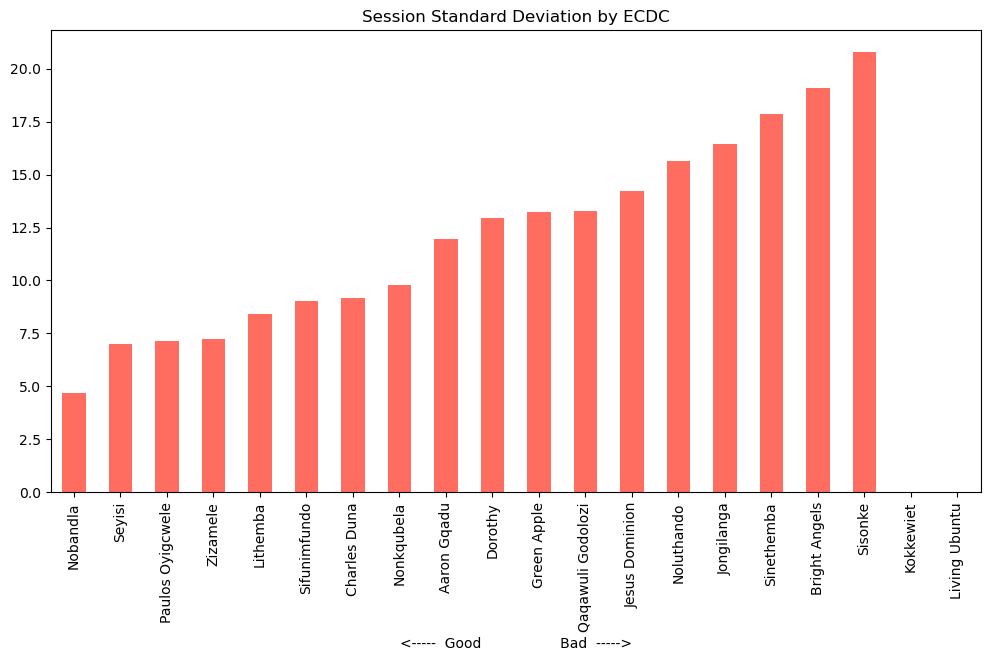

In [18]:
plt.figure(figsize=(12,6))
gbo_ecd_on['Total Sessions'].std().sort_values().plot(kind="bar", color=ECD_colour)
plt.title("Session Standard Deviation by ECDC")
plt.xlabel("<-----  Good                  Bad  ----->")

# Summary Improvement Stats

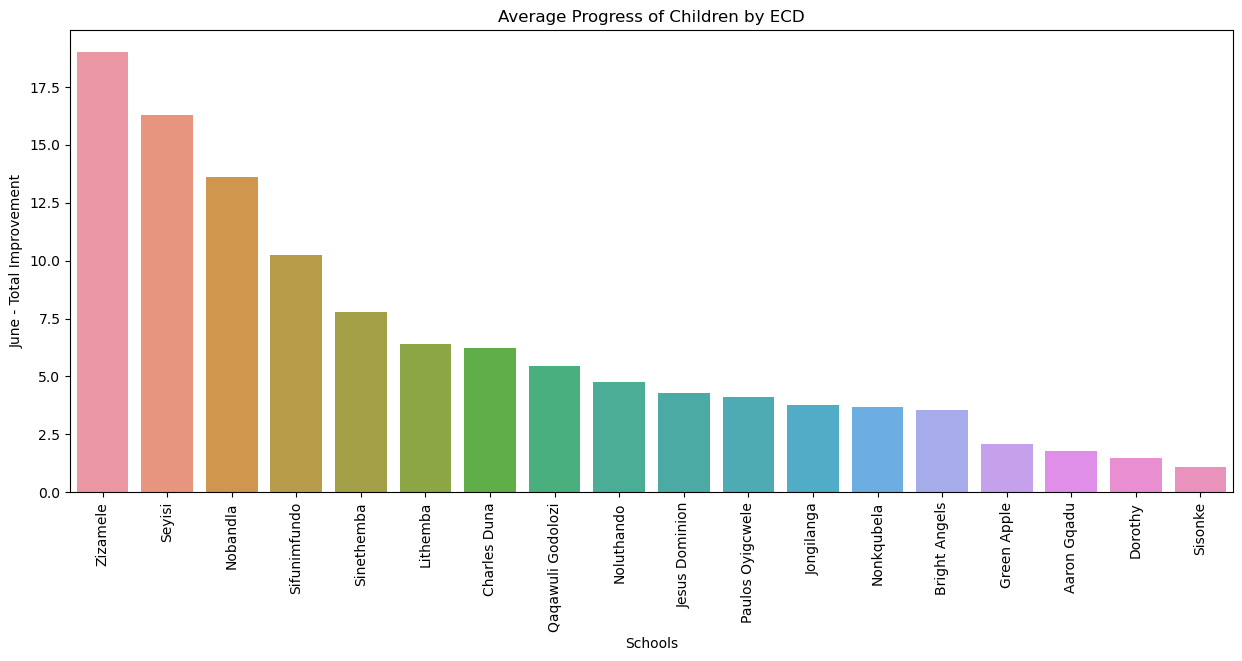

In [19]:
# First, calculate the order of schools based on the mean of 'June - Total Improvement'
order = ecd_qualify.groupby('Schools')['June - Total Improvement'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(15, 6))

# Then, pass this order to the 'order' parameter in the barplot function
sns.barplot(data=ecd_qualify, x='Schools', y='June - Total Improvement', order=order, errorbar=None, ax=ax)
plt.title("Average Progress of Children by ECD")
plt.xticks(rotation=90)
plt.show()

In [20]:
df_improvement = gbo_ecd_qualify[['June - Listen First Sound Improvement','June - Listen Word Improvement','June - Phonics Improvement','June - Total Improvement']].mean()
df_improvement.sort_values('June - Total Improvement', ascending=False)


,June - Listen First Sound Improvement,June - Listen Word Improvement,June - Phonics Improvement,June - Total Improvement
Schools,,,,
Zizamele,6.285714,6.238095,6.095238,19.000000
Seyisi,1.636364,1.363636,8.181818,16.272727
Nobandla,1.666667,-0.166667,7.000000,13.611111
Sifunimfundo,2.058824,0.117647,2.647059,10.235294
Sinethemba,0.111111,0.055556,5.000000,7.777778
Lithemba,0.764706,0.352941,2.647059,6.411765
Charles Duna,0.458333,0.291667,4.291667,6.208333
Qaqawuli Godolozi,-0.062500,0.000000,3.875000,5.437500
Noluthando,2.739130,0.000000,1.739130,4.739130


# First Sound Improvement

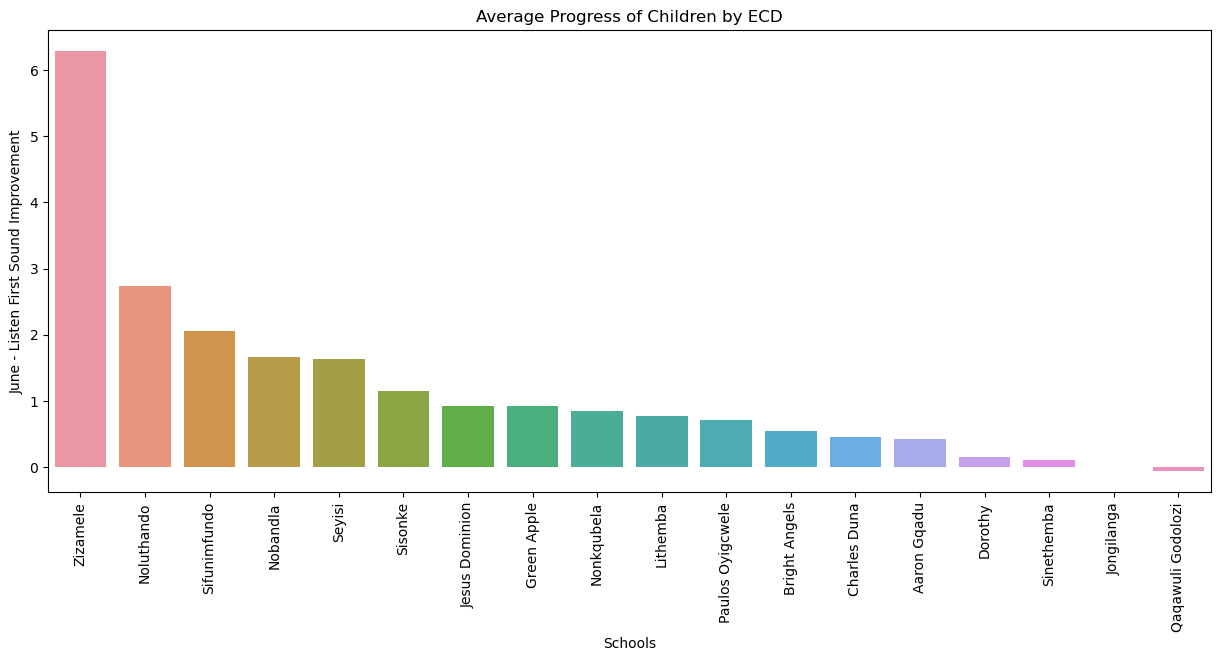

In [21]:
# First, calculate the order of schools based on the mean of 'June - Total Improvement'
order = ecd_qualify.groupby('Schools')['June - Listen First Sound Improvement'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(15, 6))

# Then, pass this order to the 'order' parameter in the barplot function
sns.barplot(data=ecd_qualify, x='Schools', y='June - Listen First Sound Improvement', order=order, errorbar=None, ax=ax)
plt.title("Average Progress of Children by ECD")
plt.xticks(rotation=90)
plt.show()

In [22]:
df_sound = gbo_ecd_qualify[['Jan - Listen First Sound', 'June - Listen First Sound', 'June - Listen First Sound Improvement']].mean()
df_sound.sort_values('June - Listen First Sound Improvement', ascending=False)

,Jan - Listen First Sound,June - Listen First Sound,June - Listen First Sound Improvement
Schools,,,
Zizamele,2.142857,8.428571,6.285714
Noluthando,0.000000,2.739130,2.739130
Sifunimfundo,0.529412,2.588235,2.058824
Nobandla,3.277778,4.944444,1.666667
Seyisi,0.090909,1.727273,1.636364
Sisonke,0.000000,1.150000,1.150000
Jesus Dominion,0.642857,1.571429,0.928571
Green Apple,1.461538,2.384615,0.923077
Nonkqubela,0.615385,1.461538,0.846154


# % of Children Improving in Listening for the First Sound
##### Criteria: Improved by at least 2 sounds; We are excluding children that initially received a perfect score as they obviously cannot improve

In [23]:
df_listen_sound = ecd_qualify[ecd_qualify['Jan - Listen First Sound'] < 10]

improved_scores = df_listen_sound[df_listen_sound['June - Listen First Sound Improvement'] >= 2].groupby('Schools')['Mcode'].nunique()
total_scores = df_listen_sound.groupby('Schools')['Mcode'].nunique()

percentage_improved = (improved_scores / total_scores) * 100

percentage_improved_df = percentage_improved.reset_index().rename(columns={'Mcode': 'Percentage Improved'})
percentage_improved_df.sort_values('Percentage Improved', ascending=False)


,Schools,Percentage Improved
17,Zizamele,100.000000
8,Nobandla,40.000000
9,Noluthando,39.130435
10,Nonkqubela,30.769231
14,Sifunimfundo,29.411765
13,Seyisi,27.272727
11,Paulos Oyigcwele,26.086957
4,Green Apple,25.000000
7,Lithemba,23.529412
5,Jesus Dominion,21.428571


# The percent of children improving in Listening to a Word
##### We are excluding children that initially received a perfect score as they obviously cannot improve

In [24]:
df_listen_word = ecd_qualify[ecd_qualify['Jan - Listen Word'] < 10]

improved_scores = df_listen_word[df_listen_word['June - Listen Word Improvement'] >= 1].groupby('Schools')['Mcode'].nunique()
total_scores = df_listen_word.groupby('Schools')['Mcode'].nunique()

percentage_improved_word = (improved_scores / total_scores) * 100

percentage_improved_word_df = percentage_improved_word.reset_index().rename(columns={'Mcode': 'Percentage Improved'})
percentage_improved_word_df.sort_values('Percentage Improved', ascending=False)

,Schools,Percentage Improved
17,Zizamele,95.238095
11,Paulos Oyigcwele,70.833333
5,Jesus Dominion,50.000000
1,Bright Angels,27.272727
13,Seyisi,27.272727
16,Sisonke,25.000000
10,Nonkqubela,23.076923
2,Charles Duna,16.666667
7,Lithemba,11.764706
15,Sinethemba,11.111111


# Phonics Improvement per ECDC


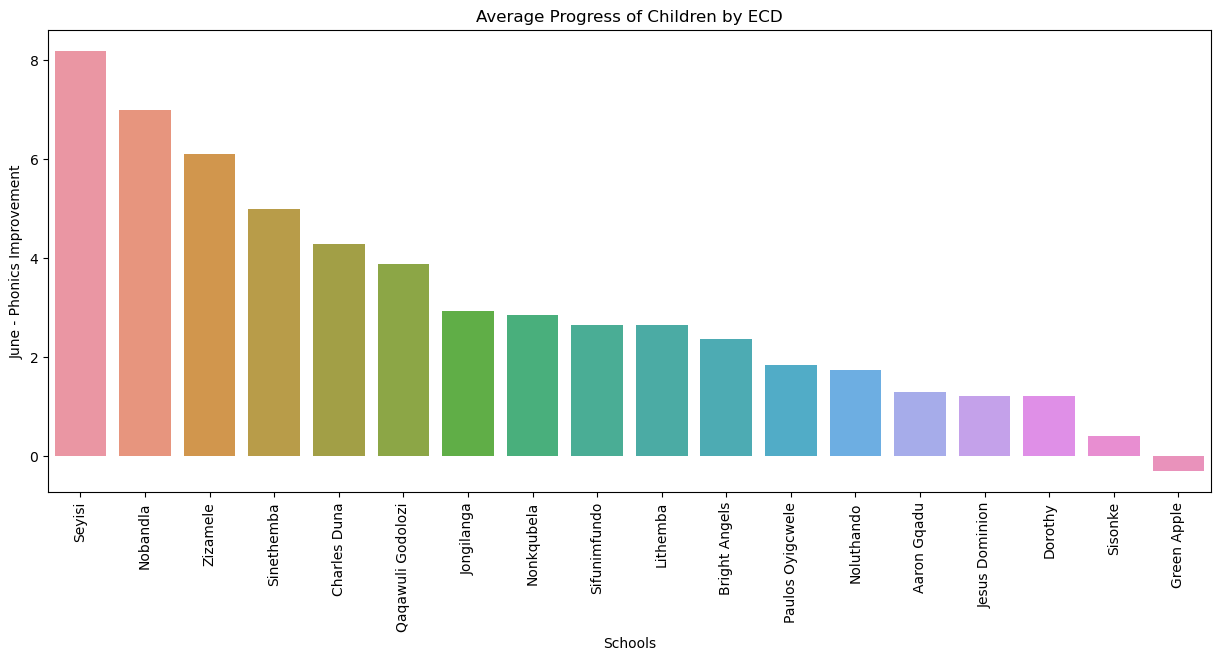

In [25]:
# First, calculate the order of schools based on the mean of 'June - Total Improvement'
order = ecd_qualify.groupby('Schools')['June - Phonics Improvement'].mean().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(15, 6))

# Then, pass this order to the 'order' parameter in the barplot function
sns.barplot(data=ecd_qualify, x='Schools', y='June - Phonics Improvement', order=order, errorbar=None, ax=ax)
plt.title("Average Progress of Children by ECD")
plt.xticks(rotation=90)
plt.show()

In [26]:
df_sound = gbo_ecd_qualify[['Jan - Phonics', 'June - Phonics', 'June - Phonics Improvement']].mean()
df_sound.sort_values('June - Phonics Improvement', ascending=False)

,Jan - Phonics,June - Phonics,June - Phonics Improvement
Schools,,,
Seyisi,0.000000,8.181818,8.181818
Nobandla,7.055556,14.055556,7.000000
Zizamele,3.047619,9.142857,6.095238
Sinethemba,1.388889,6.388889,5.000000
Charles Duna,0.000000,4.291667,4.291667
Qaqawuli Godolozi,0.187500,4.062500,3.875000
Jongilanga,1.214286,4.142857,2.928571
Nonkqubela,0.769231,3.615385,2.846154
Sifunimfundo,3.647059,6.294118,2.647059


# % of children improving in Phonics per ECDC
##### Requires learning 2 phonics or more; We are excluding children that initially received a perfect score as they obviously cannot improve

In [27]:
df_phonics = ecd_qualify[ecd_qualify['Jan - Phonics'] < 27]

improved_scores = df_phonics[df_phonics['June - Phonics Improvement'] >= 2].groupby('Schools')['Mcode'].nunique()
total_scores = df_phonics.groupby('Schools')['Mcode'].nunique()

percentage_improved = (improved_scores / total_scores) * 100

percentage_improved_phonics_df = percentage_improved.reset_index().rename(columns={'Mcode': 'Percentage Improved'})
percentage_improved_phonics_df.sort_values('Percentage Improved', ascending=False)

,Schools,Percentage Improved
15,Sinethemba,100.000000
12,Qaqawuli Godolozi,87.500000
17,Zizamele,85.714286
8,Nobandla,83.333333
1,Bright Angels,81.818182
13,Seyisi,81.818182
14,Sifunimfundo,76.470588
2,Charles Duna,70.833333
11,Paulos Oyigcwele,66.666667
9,Noluthando,65.217391


# LC Phonics Improvement Statistics
### Sorted by June - Phonics Improvement; The last column shows the % of that LCs children that improved in their phonics

In [28]:
# Your first dataframe
gbo_lc = ecd_qualify.groupby(['Schools', 'LC Name'])
phonics = gbo_lc[['Jan - Phonics', 'June - Phonics', 'June - Phonics Improvement']].mean()
phonics = phonics.reset_index().sort_values('June - Phonics Improvement', ascending=False)

# Your second dataframe
df_phonics = ecd_qualify[ecd_qualify['Jan - Phonics'] < 27]
improved_scores = df_phonics[df_phonics['June - Phonics Improvement'] >= 3].groupby(['Schools', 'LC Name'])['Mcode'].nunique()
total_scores = df_phonics.groupby(['Schools', 'LC Name'])['Mcode'].nunique()

percentage_improved = (improved_scores / total_scores) * 100
percentage_improved_phonics_df = percentage_improved.reset_index().rename(columns={'Mcode': 'Percentage Improved'})
percentage_improved_phonics_df = percentage_improved_phonics_df.sort_values(by='Percentage Improved', ascending=False)

# Merge the dataframes
merged_df = pd.merge(phonics, percentage_improved_phonics_df, on=['Schools', 'LC Name'])

merged_df


,Schools,LC Name,Jan - Phonics,June - Phonics,June - Phonics Improvement,Percentage Improved
0,Seyisi,Khanya Keli,0.000000,8.181818,8.181818,63.636364
1,Zizamele,Mahle Sixaso,3.000000,11.000000,8.000000,100.000000
2,Nobandla,Esona Mbanga,4.000000,11.875000,7.875000,75.000000
3,Nobandla,Nwabisa Mashawa,9.500000,15.800000,6.300000,70.000000
4,Charles Duna,Sinovuyo Hlulani,0.000000,5.916667,5.916667,50.000000
5,Sinethemba,Siphokazi Ncwabeni,1.454545,6.636364,5.181818,81.818182
6,Nonkqubela,Phelisa Mangesi,1.200000,6.000000,4.800000,40.000000
7,Sinethemba,Ntombovuyo Piliso,1.285714,6.000000,4.714286,85.714286
8,Jongilanga,Siyakhiwa Mesele,2.000000,6.000000,4.000000,25.000000
9,Qaqawuli Godolozi,Lolwethu Vice,0.000000,4.000000,4.000000,71.428571


# Literacy Coach Breakdowns

### Total Improvement per LC

<Axes: xlabel='LC Name,Schools'>

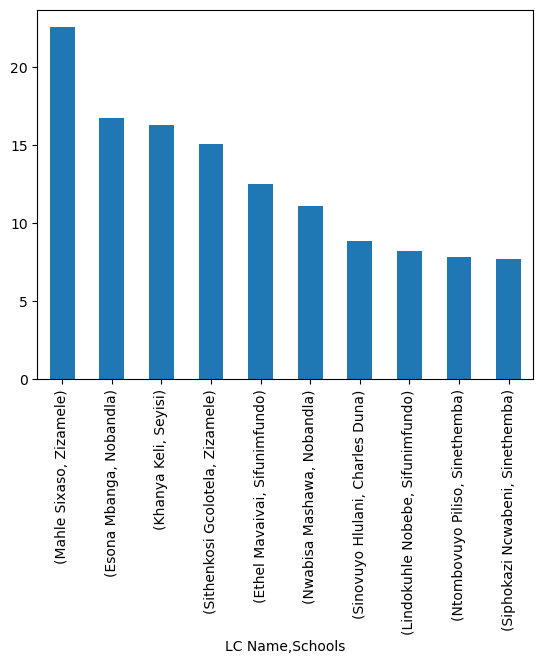

In [29]:
ecd_qualify.groupby(['LC Name', 'Schools'])['June - Total Improvement'].mean().sort_values(ascending=False).head(10).plot(kind="bar")


In [30]:
# ecd_qualify.groupby(['LC Name', 'Schools'])['June - Total Improvement'].mean().sort_values(ascending=False)

gbo_lc = ecd_qualify.groupby(['Schools', 'LC Name'])
total_score = gbo_lc[['Jan - Total', 'June - Total', 'June - Total Improvement']].mean()
total_score.sort_values('June - Total Improvement', ascending=False)

,,Jan - Total,June - Total,June - Total Improvement
Schools,LC Name,,,
Zizamele,Mahle Sixaso,9.727273,32.272727,22.545455
Nobandla,Esona Mbanga,10.750000,27.500000,16.750000
Seyisi,Khanya Keli,0.727273,17.000000,16.272727
Zizamele,Sithenkosi Gcolotela,7.300000,22.400000,15.100000
Sifunimfundo,Ethel Mavaivai,10.500000,23.000000,12.500000
Nobandla,Nwabisa Mashawa,20.700000,31.800000,11.100000
Charles Duna,Sinovuyo Hlulani,0.000000,8.833333,8.833333
Sifunimfundo,Lindokuhle Nobebe,1.888889,10.111111,8.222222
Sinethemba,Ntombovuyo Piliso,2.285714,10.142857,7.857143


### LC List Sorted by % of LC's Children That Improved in Total Score


In [31]:
total_improved_scores = ecd_qualify[ecd_qualify['June - Total Improvement'] >= 3].groupby(['LC Name', 'Schools'])['Mcode'].nunique()
total_scores = ecd_qualify.groupby('LC Name')['Mcode'].nunique()

percentage_improved = (total_improved_scores / total_scores) * 100

percentage_improved_total_df = percentage_improved.reset_index().rename(columns={'Mcode': 'Percentage Improved'})


# Sort by 'Percentage Improved' in descending order
percentage_improved_total_df.sort_values(by='Percentage Improved', ascending=False)

,LC Name,Schools,Percentage Improved
13,Mahle Sixaso,Zizamele,100.000000
25,Siphokazi Ncwabeni,Sinethemba,100.000000
28,Sithenkosi Gcolotela,Zizamele,90.000000
0,Akhona Pita,Qaqawuli Godolozi,88.888889
5,Esona Mbanga,Nobandla,87.500000
6,Ethel Mavaivai,Sifunimfundo,87.500000
15,Ntombovuyo Piliso,Sinethemba,85.714286
27,Sisipho Xhamntwana,Paulos Oyigcwele,83.333333
8,Khanya Keli,Seyisi,81.818182
24,Siphesihle Biko,Lithemba,77.777778


### First Sounds Improvement per Literacy Coach

<Axes: xlabel='LC Name,Schools'>

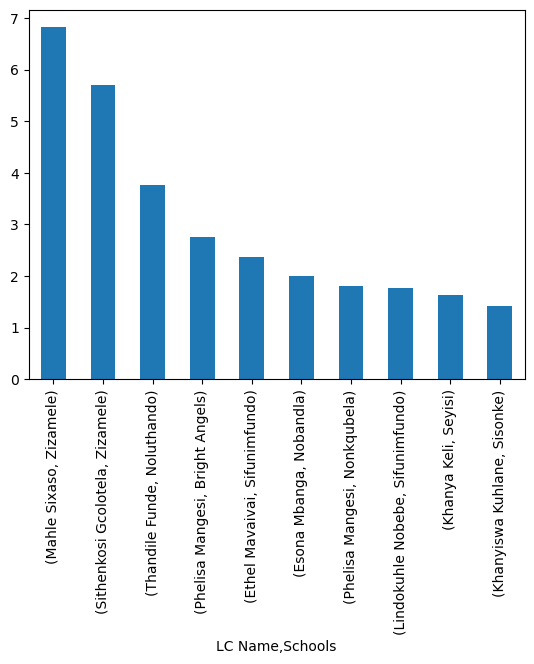

In [32]:

ecd_qualify.groupby(['LC Name', 'Schools'])["June - Listen First Sound Improvement"].mean().sort_values(ascending=False).head(10).plot(kind="bar")

In [33]:
gbo_lc = ecd_qualify.groupby(['Schools', 'LC Name'])
first_sound = gbo_lc[['Jan - Listen First Sound', 'June - Listen First Sound', 'June - Listen First Sound Improvement']].mean()
first_sound.sort_values('June - Listen First Sound Improvement', ascending=False)

Jan - Listen First Sound  \
Schools           LC Name                                          
Zizamele          Mahle Sixaso                          2.727273   
                  Sithenkosi Gcolotela                  1.500000   
Noluthando        Thandile Funde                        0.000000   
Bright Angels     Phelisa Mangesi                       0.000000   
Sifunimfundo      Ethel Mavaivai                        1.125000   
Nobandla          Esona Mbanga                          2.875000   
Nonkqubela        Phelisa Mangesi                       1.600000   
Sifunimfundo      Lindokuhle Nobebe                     0.000000   
Seyisi            Khanya Keli                           0.090909   
Sisonke           Khanyiswa Kuhlane                     0.000000   
Noluthando        Chulumanco Boloti                     0.000000   
Nobandla          Nwabisa Mashawa                       3.600000   
Jesus Dominion    Blessing Muronzi                      0.142857   
Paulos Oyigcwele  Hazel Khumalo                         0.500000   
Green Apple       Phelelwe Nyoka                        1.727273   
Lithemba          Siphokazi Soxujwa                     0.000000   
Sisonke           Alizwa Tsili                          0.000000   
Jesus Dominion    Yandisa Ntsumpa                       1.142857   
Lithemba          Siphesihle Biko                       1.111111   
Aaron Gqadu       Zimkhitha Mvinjelwa                   0.000000   
Charles Duna      Sinovuyo Hlulani                      0.000000   
                  Ncumisa Mselani                       0.083333   
Aaron Gqadu       Zintle Majola                         0.000000   
Dorothy           Khanyisa Mini                         0.272727   
Paulos Oyigcwele  Sisipho Xhamntwana                    1.666667   
Nonkqubela        Sanelisiwe Nonkwe                     0.000000   
Sinethemba        Siphokazi Ncwabeni                    0.090909   
Qaqawuli Godolozi Lolwethu Vice                         0.000000   
Dorothy           Saneliso Ndlovu                       1.625000   
Jongilanga        Siyakhiwa Mesele                      0.000000   
Sinethemba        Ntombovuyo Piliso                     0.000000   
Green Apple       Basanele Hlwempu                      0.000000   
Jongilanga        Phumla Rasmeni                        0.000000   
Qaqawuli Godolozi Akhona Pita                           0.111111   
Bright Angels     Yibanathi Mpumlwana                   1.142857   

                                        June - Listen First Sound  \
Schools           LC Name                                           
Zizamele          Mahle Sixaso                           9.545455   
                  Sithenkosi Gcolotela                   7.200000   
Noluthando        Thandile Funde                         3.769231   
Bright Angels     Phelisa Mangesi                        2.750000   
Sifunimfundo      Ethel Mavaivai                         3.500000   
Nobandla          Esona Mbanga                           4.875000   
Nonkqubela        Phelisa Mangesi                        3.400000   
Sifunimfundo      Lindokuhle Nobebe                      1.777778   
Seyisi            Khanya Keli                            1.727273   
Sisonke           Khanyiswa Kuhlane                      1.416667   
Noluthando        Chulumanco Boloti                      1.400000   
Nobandla          Nwabisa Mashawa                        5.000000   
Jesus Dominion    Blessing Muronzi                       1.428571   
Paulos Oyigcwele  Hazel Khumalo                          1.666667   
Green Apple       Phelelwe Nyoka                         2.818182   
Lithemba          Siphokazi Soxujwa                      1.000000   
Sisonke           Alizwa Tsili                           0.750000   
Jesus Dominion    Yandisa Ntsumpa                        1.714286   
Lithemba          Siphesihle Biko                        1.666667   
Aaron Gqadu       Zimkhitha Mvinjelwa                    0.500000   
Charl

### Phonics Improvement per Literacy Coach

<Axes: xlabel='LC Name,Schools'>

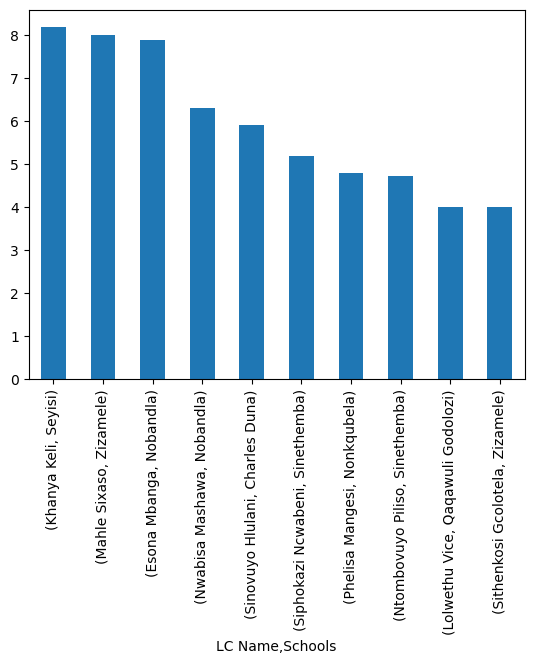

In [34]:
ecd_qualify.groupby(['LC Name', 'Schools'])['June - Phonics Improvement'].mean().sort_values(ascending=False).head(10).plot(kind="bar")

In [35]:
# ecd_qualify.groupby(['LC Name', 'Schools'])['June - Phonics Improvement'].mean().sort_values(ascending=False)
gbo_lc = ecd_qualify.groupby(['Schools', 'LC Name'])
phonics = gbo_lc[['Jan - Phonics', 'June - Phonics', 'June - Phonics Improvement']].mean()
phonics.sort_values('June - Phonics Improvement', ascending=False)

Jan - Phonics  June - Phonics  \
Schools           LC Name                                               
Seyisi            Khanya Keli                0.000000        8.181818   
Zizamele          Mahle Sixaso               3.000000       11.000000   
Nobandla          Esona Mbanga               4.000000       11.875000   
                  Nwabisa Mashawa            9.500000       15.800000   
Charles Duna      Sinovuyo Hlulani           0.000000        5.916667   
Sinethemba        Siphokazi Ncwabeni         1.454545        6.636364   
Nonkqubela        Phelisa Mangesi            1.200000        6.000000   
Sinethemba        Ntombovuyo Piliso          1.285714        6.000000   
Jongilanga        Siyakhiwa Mesele           2.000000        6.000000   
Qaqawuli Godolozi Lolwethu Vice              0.000000        4.000000   
Zizamele          Sithenkosi Gcolotela       3.100000        7.100000   
Qaqawuli Godolozi Akhona Pita                0.333333        4.111111   
Lithemba          Siphesihle Biko            2.000000        5.666667   
Sifunimfundo      Ethel Mavaivai             5.625000        8.750000   
Bright Angels     Phelisa Mangesi            1.250000        4.250000   
Noluthando        Chulumanco Boloti          2.200000        4.900000   
Charles Duna      Ncumisa Mselani            0.000000        2.666667   
Green Apple       Basanele Hlwempu           0.000000        2.500000   
Jesus Dominion    Blessing Muronzi           0.285714        2.714286   
Sifunimfundo      Lindokuhle Nobebe          1.888889        4.111111   
Bright Angels     Yibanathi Mpumlwana        1.142857        3.142857   
Paulos Oyigcwele  Hazel Khumalo              0.833333        2.833333   
Aaron Gqadu       Zimkhitha Mvinjelwa        0.500000        2.250000   
Paulos Oyigcwele  Sisipho Xhamntwana         0.500000        2.166667   
Nonkqubela        Sanelisiwe Nonkwe          0.500000        2.125000   
Jongilanga        Phumla Rasmeni             0.166667        1.666667   
Dorothy           Saneliso Ndlovu            2.750000        4.250000   
Lithemba          Siphokazi Soxujwa          2.125000        3.625000   
Dorothy           Khanyisa Mini              0.272727        1.272727   
Noluthando        Thandile Funde             1.615385        2.615385   
Aaron Gqadu       Zintle Majola              1.500000        2.166667   
Sisonke           Alizwa Tsili               3.750000        4.375000   
                  Khanyiswa Kuhlane          3.416667        3.666667   
Jesus Dominion    Yandisa Ntsumpa            4.142857        4.142857   
Green Apple       Phelelwe Nyoka             3.181818        2.363636   

                                        June - Phonics Improvement  
Schools           LC Name                                           
Seyisi            Khanya Keli                             8.181818  
Zizamele          Mahle Sixaso                            8.000000  
Nobandla          Esona Mbanga                            7.875000  
                  Nwabisa Mashawa                         6.300000  
Charles Duna      Sinovuyo Hlulani                        5.916667  
Sinethemba        Siphokazi Ncwabeni                      5.181818  
Nonkqubela        Phelisa Mangesi                         4.800000  
Sinethemba        Ntombovuyo Piliso                       4.714286  
Jongilanga        Siyakhiwa Mesele                        4.000000  
Qaqawuli Godolozi Lolwethu Vice                           4.000000  
Zizamele          Sithenkosi Gcolotela                    4.000000  
Qaqawuli Godolozi Akhona Pita                             3.777778  
Lithemba          Siphesihle Biko                         3.666667  
Sifunimfundo      Ethel Mavaivai                          3.125000  
Bright Angels     Phelisa Mangesi                         3.000000  
Noluthando        Chulumanco Boloti                       2.700000  
Charles Duna      Ncumisa Mselani                         2.666667  
Green Apple       Basanele 

### LC List Sorted by % of LC's Children That Improved in Phonics

In [36]:
df_phonics = ecd_qualify[ecd_qualify['Jan - Phonics'] < 27]

improved_scores = df_phonics[df_phonics['June - Phonics Improvement'] >= 3].groupby('LC Name')['Mcode'].nunique()
total_scores = df_phonics.groupby('LC Name')['Mcode'].nunique()

percentage_improved = (improved_scores / total_scores) * 100

percentage_improved_phonics_df = percentage_improved.reset_index().rename(columns={'Mcode': 'Percentage Improved'})


# Sort by 'Percentage Improved' in descending order
percentage_improved_phonics_df.sort_values(by='Percentage Improved', ascending=False)

,LC Name,Percentage Improved
13,Mahle Sixaso,100.000000
0,Akhona Pita,88.888889
6,Ethel Mavaivai,87.500000
15,Ntombovuyo Piliso,85.714286
24,Siphokazi Ncwabeni,81.818182
23,Siphesihle Biko,77.777778
5,Esona Mbanga,75.000000
12,Lolwethu Vice,71.428571
27,Sithenkosi Gcolotela,70.000000
16,Nwabisa Mashawa,70.000000


### Written Letters Improvement per LC

In [37]:
ecd_qualify.groupby(['LC Name', 'Schools'])['June - Written Letters Improvement'].mean().sort_values(ascending=False)


LC Name               Schools          
Esona Mbanga          Nobandla             7.500000
Khanya Keli           Seyisi               4.363636
Ethel Mavaivai        Sifunimfundo         4.125000
Lindokuhle Nobebe     Sifunimfundo         3.777778
Nwabisa Mashawa       Nobandla             3.400000
Ntombovuyo Piliso     Sinethemba           3.142857
Blessing Muronzi      Jesus Dominion       2.857143
Siphokazi Ncwabeni    Sinethemba           2.090909
Siphokazi Soxujwa     Lithemba             1.875000
Sinovuyo Hlulani      Charles Duna         1.833333
Siyakhiwa Mesele      Jongilanga           1.625000
Lolwethu Vice         Qaqawuli Godolozi    1.428571
Phelelwe Nyoka        Green Apple          1.363636
Siphesihle Biko       Lithemba             1.111111
Akhona Pita           Qaqawuli Godolozi    1.111111
Mahle Sixaso          Zizamele             1.000000
Saneliso Ndlovu       Dorothy              0.625000
Sisipho Xhamntwana    Paulos Oyigcwele     0.583333
Yandisa Ntsumpa       Je

# Lowest Performing Literacy Coaches


In [38]:
gbo_lc = ecd_qualify.groupby(['Schools', 'LC Name'])
total_score = gbo_lc[['Total Sessions', 'June - Listen First Sound Improvement', 'June - Phonics Improvement', 'June - Total Improvement']].mean()
total_score.sort_values('June - Total Improvement').head(10)

Total Sessions  \
Schools     LC Name                               
Sisonke     Khanyiswa Kuhlane         39.166667   
Aaron Gqadu Zintle Majola             35.500000   
Jongilanga  Phumla Rasmeni            20.000000   
Nonkqubela  Sanelisiwe Nonkwe         34.500000   
Dorothy     Khanyisa Mini             36.545455   
            Saneliso Ndlovu           37.000000   
Sisonke     Alizwa Tsili              35.000000   
Green Apple Basanele Hlwempu          12.500000   
            Phelelwe Nyoka            28.363636   
Aaron Gqadu Zimkhitha Mvinjelwa       32.750000   

                                 June - Listen First Sound Improvement  \
Schools     LC Name                                                      
Sisonke     Khanyiswa Kuhlane                                 1.416667   
Aaron Gqadu Zintle Majola                                     0.333333   
Jongilanga  Phumla Rasmeni                                    0.000000   
Nonkqubela  Sanelisiwe Nonkwe                                 0.250000   
Dorothy     Khanyisa Mini                                     0.272727   
            Saneliso Ndlovu                                   0.000000   
Sisonke     Alizwa Tsili                                      0.750000   
Green Apple Basanele Hlwempu                                  0.000000   
            Phelelwe Nyoka                                    1.090909   
Aaron Gqadu Zimkhitha Mvinjelwa                               0.500000   

                                 June - Phonics Improvement  \
Schools     LC Name                                           
Sisonke     Khanyiswa Kuhlane                      0.250000   
Aaron Gqadu Zintle Majola                          0.666667   
Jongilanga  Phumla Rasmeni                         1.500000   
Nonkqubela  Sanelisiwe Nonkwe                      1.625000   
Dorothy     Khanyisa Mini                          1.000000   
            Saneliso Ndlovu                        1.500000   
Sisonke     Alizwa Tsili                           0.625000   
Green Apple Basanele Hlwempu                       2.500000   
            Phelelwe Nyoka                        -0.818182   
Aaron Gqadu Zimkhitha Mvinjelwa                    1.750000   

                                 June - Total Improvement  
Schools     LC Name                                        
Sisonke     Khanyiswa Kuhlane                    0.750000  
Aaron Gqadu Zintle Majola                        1.166667  
Jongilanga  Phumla Rasmeni                       1.333333  
Nonkqubela  Sanelisiwe Nonkwe                    1.375000  
Dorothy     Khanyisa Mini                        1.454545  
            Saneliso Ndlovu                      1.500000  
Sisonke     Alizwa Tsili                         1.625000  
Green Apple Basanele Hlwempu                     2.000000  
            Phelelwe Nyoka                       2.090909  
Aaron Gqadu Zimkhitha Mvinjelwa                  2.250000

# Top Performing Children

### Top Performing Children Total Scores

In [39]:
ecd_qualify[['Full Name', 'Schools', 'LC Name','Total Sessions', 'Jan - Total', 'June - Total','June - Total Improvement']].sort_values('June - Total Improvement', ascending=False).head(20)

,Full Name,Schools,LC Name,Total Sessions,Jan - Total,June - Total,June - Total Improvement
129,Siwula Simfumene,Seyisi,Khanya Keli,27.0,4.0,49.0,45.0
2573,Qona Azingce,Nobandla,Nwabisa Mashawa,20.0,3.0,44.0,41.0
654,Qoko Somila,Jesus Dominion,Blessing Muronzi,41.0,3.0,44.0,41.0
3597,Peter Liwaphakade,Jongilanga,Siyakhiwa Mesele,57.0,0.0,39.0,39.0
973,Guimunyu Olunje,Nobandla,Esona Mbanga,12.0,3.0,39.0,36.0
941,Shongwe Likuthi,Nobandla,Esona Mbanga,11.0,23.0,59.0,36.0
620,Ndzimase Kungentando,Charles Duna,Sinovuyo Hlulani,21.0,0.0,33.0,33.0
1718,Moyi Esothando,Zizamele,Mahle Sixaso,25.0,0.0,33.0,33.0
227,Mbanga Luxolo,Seyisi,Khanya Keli,34.0,1.0,34.0,33.0
1048,Faltein Ayabonga,Sifunimfundo,Ethel Mavaivai,23.0,34.0,65.0,31.0


### Top Performing Children: First Sounds

In [40]:
ecd_qualify[['Full Name', 'Schools', 'LC Name','Total Sessions', 'Jan - Listen First Sound', 'June - Listen First Sound','June - Listen First Sound Improvement']].sort_values('June - Listen First Sound Improvement', ascending=False).head(20)

,Full Name,Schools,LC Name,Total Sessions,Jan - Listen First Sound,June - Listen First Sound,June - Listen First Sound Improvement
1529,Rabula Culolwethu,Sifunimfundo,Lindokuhle Nobebe,11.0,0.0,10.0,10.0
1777,Manqushu Imivuyo,Zizamele,Mahle Sixaso,34.0,0.0,10.0,10.0
1817,Yazo Achumile,Zizamele,Mahle Sixaso,36.0,0.0,10.0,10.0
1815,Vena Mikhulu Ncumo,Zizamele,Mahle Sixaso,36.0,0.0,10.0,10.0
3801,Mbatana Hlalumi,Noluthando,Thandile Funde,49.0,0.0,10.0,10.0
2722,Sana Lubanzi,Bright Angels,Phelisa Mangesi,53.0,0.0,10.0,10.0
3490,Mdunyelwa Hlaluminathi,Zizamele,Sithenkosi Gcolotela,29.0,0.0,10.0,10.0
129,Siwula Simfumene,Seyisi,Khanya Keli,27.0,0.0,10.0,10.0
3486,Roloba Zimingonaphakade,Zizamele,Sithenkosi Gcolotela,36.0,0.0,10.0,10.0
3785,Mahala Minentle,Noluthando,Thandile Funde,46.0,0.0,10.0,10.0


### Top Performing Children: Phonics

In [41]:
ecd_qualify[['Full Name', 'Schools', 'LC Name','Total Sessions', 'Jan - Phonics', 'June - Phonics','June - Phonics Improvement']].sort_values('June - Phonics Improvement', ascending=False).head(20)

,Full Name,Schools,LC Name,Total Sessions,Jan - Phonics,June - Phonics,June - Phonics Improvement
3597,Peter Liwaphakade,Jongilanga,Siyakhiwa Mesele,57.0,0.0,25.0,25.0
620,Ndzimase Kungentando,Charles Duna,Sinovuyo Hlulani,21.0,0.0,25.0,25.0
2573,Qona Azingce,Nobandla,Nwabisa Mashawa,20.0,0.0,24.0,24.0
2634,Madikane Milani,Nonkqubela,Phelisa Mangesi,15.0,1.0,19.0,18.0
129,Siwula Simfumene,Seyisi,Khanya Keli,27.0,0.0,17.0,17.0
3935,Mdunyelwa Ivenathi,Seyisi,Khanya Keli,18.0,0.0,17.0,17.0
973,Guimunyu Olunje,Nobandla,Esona Mbanga,12.0,0.0,17.0,17.0
227,Mbanga Luxolo,Seyisi,Khanya Keli,34.0,0.0,16.0,16.0
941,Shongwe Likuthi,Nobandla,Esona Mbanga,11.0,11.0,26.0,15.0
943,Silo Anganathi,Nobandla,Esona Mbanga,12.0,5.0,18.0,13.0


# Low Performing Children
##### Need to check in on these children, obviously must be patient with the little ones plus consider many are intimidated during assessments

In [42]:
ecd_qualify[['Full Name', 'Schools', 'LC Name','Total Sessions', 'Jan - Total', 'June - Total','June - Total Improvement']].sort_values('June - Total Improvement').head(50)

,Full Name,Schools,LC Name,Total Sessions,Jan - Total,June - Total,June - Total Improvement
651,Mkathana Alive,Jesus Dominion,Blessing Muronzi,23.0,12.0,3.0,-9.0
97,Qosho Buncwane,Sisonke,Alizwa Tsili,16.0,10.0,3.0,-7.0
1337,Kwedini Anovuyo,Sisonke,Khanyiswa Kuhlane,25.0,6.0,0.0,-6.0
2789,Masimini Buncwane,Nonkqubela,Sanelisiwe Nonkwe,39.0,5.0,0.0,-5.0
4001,Ngethu Kungoyolo,Bright Angels,Yibanathi Mpumlwana,40.0,5.0,0.0,-5.0
2577,Fene Mpho,Nobandla,Nwabisa Mashawa,20.0,20.0,15.0,-5.0
2639,Mpahlane Lubone,Nonkqubela,Phelisa Mangesi,24.0,9.0,5.0,-4.0
1021,Plaatjie Luveni,Sifunimfundo,Ethel Mavaivai,43.0,22.0,18.0,-4.0
2801,Ntoba Indiphile,Dorothy,Saneliso Ndlovu,47.0,6.0,3.0,-3.0
2784,Madikana Unam,Nonkqubela,Sanelisiwe Nonkwe,34.0,4.0,1.0,-3.0


# PLOTLY GRAPHS

In [43]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Build App
app = JupyterDash(__name__)

# Create a list of unique schools to use in the dropdown menu
schools = df['Schools'].unique()

app.layout = html.Div([
    html.H1("June - Total Improvement Histogram"),
    dcc.Dropdown(
        id='school-dropdown',
        options=[{'label': i, 'value': i} for i in schools],
        value=schools[0]
    ),
    dcc.Graph(id='graph')
])

# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("school-dropdown", "value")]
)
def update_figure(selected_school):
    filtered_df = df[df['Schools'] == selected_school]
    fig = px.histogram(filtered_df, x="June - Total Improvement", nbins=20)
    return fig

# Run app and display result inline in the notebook
app.run_server(mode='inline')


Dash is running on http://127.0.0.1:8050/



/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_77277/75754704.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/var/folders/l_/by_m7hfx3rb1rg2p44yb7m040000gn/T/ipykernel_77277/75754704.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [44]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Build App
app = JupyterDash(__name__)

# Create a list of unique schools to use in the dropdown menu
schools = ecd['Schools'].unique()

app.layout = html.Div([
    html.H1("Total Sessions vs June - Total Improvement Scatterplot"),
    dcc.Dropdown(
        id='school-dropdown',
        options=[{'label': i, 'value': i} for i in schools],
        value=schools[0]
    ),
    dcc.Graph(id='graph')
])

# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("school-dropdown", "value")]
)
def update_figure(selected_school):
    filtered_df = ecd[ecd['Schools'] == selected_school]
    fig = px.scatter(filtered_df, x="Total Sessions", y="June - Total Improvement", color='LC Name')
    return fig

# Run app and display result inline in the notebook
app.run_server(mode='inline', port=8051)



Dash is running on http://127.0.0.1:8051/

